In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [2]:
def dy_dt(y, t, omega, fcf):
    y1, y2, y3, y4 = y
    return [y2, 2*omega*y1*y4 + y1*(fcf * omega**2 + y4**2), y4, -(2*y2/y1)*(omega+y4)]

In [3]:
R = 1000e3  # m
omega = 0.18 * np.pi/180 # degrees/s, convert to rad/s
omega_0 = 0
v0 = -omega * R
y0 = [R, v0, 0, 0]
fcf = 1

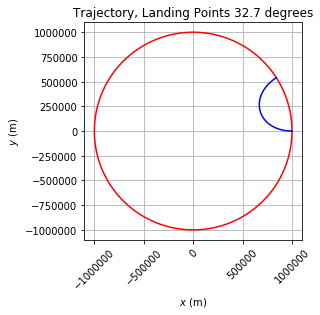

In [4]:
t_start = 0
t_end = 10000
nt = 10000
t = np.linspace(t_start, t_end, nt)
sol = odeint(dy_dt, y0, t, args=(omega,fcf))
r, _, phi, _ = sol.T

# instead of a while loop, we can check for points within the circle
# creating a boolean mask, which will be more efficient.
# Also note that the original k is equivalent to mask.sum()
x_full, y_full = r*np.cos(phi), r*np.sin(phi)
mask = x_full**2 + y_full**2 <= R**2

x = x_full[mask]
y = y_full[mask]
angle = np.arctan(y[-1]/x[-1])

pts = np.linspace(0, 2*np.pi, nt)

# don't need to use a for loop here!
xcirc = R * np.cos(pts)
ycirc = R * np.sin(pts)    

plt.figure(1)
ax = plt.axes()
ax.set_aspect(1)
plt.plot(xcirc, ycirc, 'r')
plt.plot(x, y, 'b')

plt.xlabel('$x\ (\mathrm{m})$')
plt.ylabel('$y\ (\mathrm{m})$')
plt.title(f"Trajectory, Landing Points {round(angle*180/np.pi, 2)} degrees")
plt.xticks(rotation=45)
plt.grid()
plt.show()

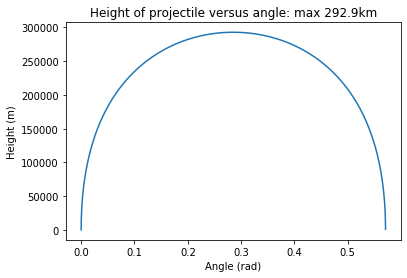

In [5]:
plt.figure(2)
ax = plt.axes()
h = R - r[mask]
plt.plot(phi[mask], h)
plt.xlabel("Angle (rad)")
plt.ylabel("Height (m)")
plt.title(f"Height of projectile versus angle: max {round(h.max()/1000, 1)}km")

plt.show()

In [6]:
# non inertial equations from exmaple 5.5.1, Fowles & Cassiday Analytical Mechanics, 7th ed.
def phi_prime(t):
    return np.arctan(omega*t/(1-omega*t)) - omega * t
def r_prime(t):
    return R*np.sqrt(1-2*omega*t*(1-omega*t))

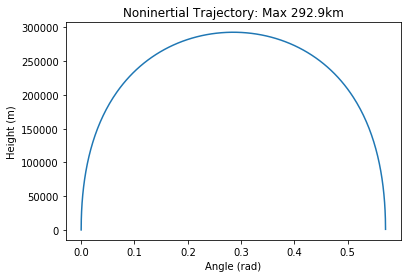

In [9]:
phi_non = phi_prime(t)
r_non  = r_prime(t)

mask = x_full**2 + y_full**2 <= R**2
h = R - r_non[mask]
plt.plot(phi_non[mask], h)
plt.xlabel("Angle (rad)")
plt.ylabel("Height (m)")
plt.title(f"Noninertial Trajectory: Max {round(h.max()/1000, 1)}km")

plt.show()